In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels import regression
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

First we'll define a function that performs linear regression and plots the results.

In [23]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

Now we'll get pricing data on TSLA and SPY and perform a regression.

In [13]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2015, 1, 1)
asset = web.DataReader('TSLA','yahoo', start, end)
benchmark = web.DataReader('SPY', 'yahoo', start, end)

In [16]:
asset.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,149.800003,152.479996,146.550003,150.100006,6188400,150.100006
2014-01-03,150.000000,152.190002,148.600006,149.559998,4695000,149.559998
2014-01-06,150.000000,150.399994,145.240005,147.000000,5361100,147.000000
2014-01-07,147.619995,150.399994,145.250000,149.360001,5034100,149.360001
2014-01-08,148.850006,153.699997,148.759995,151.279999,6163200,151.279999


In [17]:
asset_close = asset.Close
asset_close.head()

Date
2014-01-02    150.100006
2014-01-03    149.559998
2014-01-06    147.000000
2014-01-07    149.360001
2014-01-08    151.279999
Name: Close, dtype: float64

In [18]:
benchmark_close = benchmark.Close
benchmark_close.head()

Date
2014-01-02    182.919998
2014-01-03    182.889999
2014-01-06    182.360001
2014-01-07    183.479996
2014-01-08    183.520004
Name: Close, dtype: float64

In [24]:
# We have to take the perent changes to get to returns
# Get rid of the first (0th) element because it is NaN

r_a = asset_close.pct_change()[1:]
r_b = benchmark_close.pct_change()[1:]

In [25]:
r_a.head()

Date
2014-01-03   -0.003598
2014-01-06   -0.017117
2014-01-07    0.016054
2014-01-08    0.012855
2014-01-09   -0.024788
Name: Close, dtype: float64

Nice, now let run the linear regression function for the two return series.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     64.79
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           3.43e-14
Time:                        20:41:19   Log-Likelihood:                 549.38
No. Observations:                 251   AIC:                            -1095.
Df Residuals:                     249   BIC:                            -1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0011      0.002      0.620      0.536        -0.002     0.004
x1             1.9534      0.243      8.049      0.000         1.475     2.431
==============================================================================
Omnibus:                       64.336   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.056
Skew:                           0.853   Prob(JB):                     1.33e-82
Kurtosis:                       8.757   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

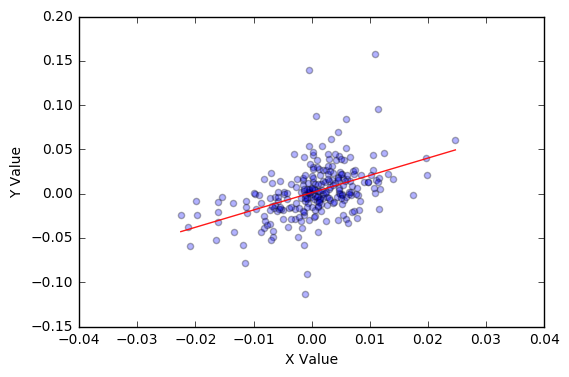

In [26]:
linreg(r_b.values, r_a.values)

Let's try another time frame to see how this changes. Afterall, these values are only estimates and will likely change with time.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     8.511
Date:                Tue, 20 Dec 2016   Prob (F-statistic):            0.00385
Time:                        21:21:15   Log-Likelihood:                 439.70
No. Observations:                 251   AIC:                            -875.4
Df Residuals:                     249   BIC:                            -868.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0056      0.003      2.079      0.039         0.000     0.011
x1             1.1350      0.389      2.917      0.004         0.369     1.901
==============================================================================
Omnibus:                       84.690   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.044
Skew:                           1.170   Prob(JB):                    5.38e-118
Kurtosis:                       9.794   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

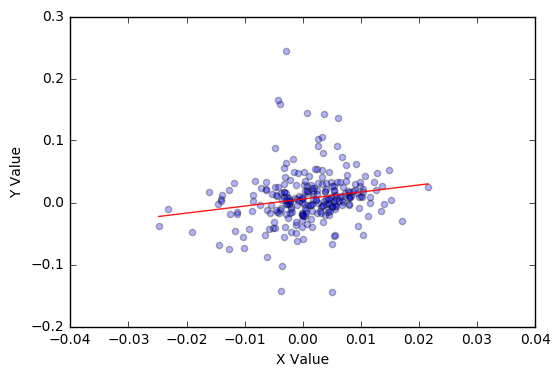

In [30]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2014, 1, 1)
asset = web.DataReader('TSLA','yahoo', start, end)
benchmark = web.DataReader('SPY', 'yahoo', start, end)

asset_close = asset.Close
asset_close.head()
benchmark_close = benchmark.Close
benchmark_close.head()

r_a = asset_close.pct_change()[1:]
r_b = benchmark_close.pct_change()[1:]

linreg(r_b.values, r_a.values)

In [31]:
# Let's quickly take a look at the correlation
np.corrcoef(r_a.values, r_b.values)

array([[ 1.        ,  0.18180341],
       [ 0.18180341,  1.        ]])

## Example Case
Now let's see what happens if we regress two purely random variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.420
Date:                Tue, 20 Dec 2016   Prob (F-statistic):              0.236
Time:                        21:33:28   Log-Likelihood:                -17.584
No. Observations:                 100   AIC:                             39.17
Df Residuals:                      98   BIC:                             44.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5778      0.059      9.824      0.000         0.461     0.695
x1            -0.1203      0.101     -1.192      0.236        -0.321     0.080
==============================================================================
Omnibus:                       28.232   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.669
Skew:                          -0.053   Prob(JB):                       0.0588
Kurtosis:                       1.838   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

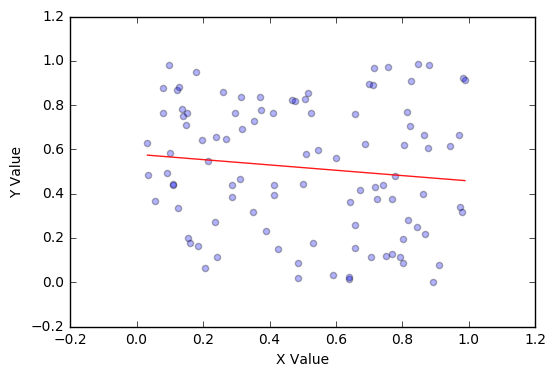

In [32]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X,Y)

In [33]:
# Let's quickly take a look at the correlation
np.corrcoef(X,Y)

array([[ 1.       , -0.1195074],
       [-0.1195074,  1.       ]])

The above shows a fairly uniform cloud of points. It is important to note that even with 100 samples, the line has a visible slope due to random chance. This is why it is crucial to use statistical tests and not visualizations to verify results.

Now let's make Y dependent on X plus some random noise

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     215.8
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           1.65e-26
Time:                        21:33:57   Log-Likelihood:                 22.190
No. Observations:                 100   AIC:                            -40.38
Df Residuals:                      98   BIC:                            -35.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0452      0.040      1.143      0.256        -0.033     0.124
x1             0.9965      0.068     14.690      0.000         0.862     1.131
==============================================================================
Omnibus:                        2.123   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.646
Skew:                          -0.117   Prob(JB):                        0.439
Kurtosis:                       3.583   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

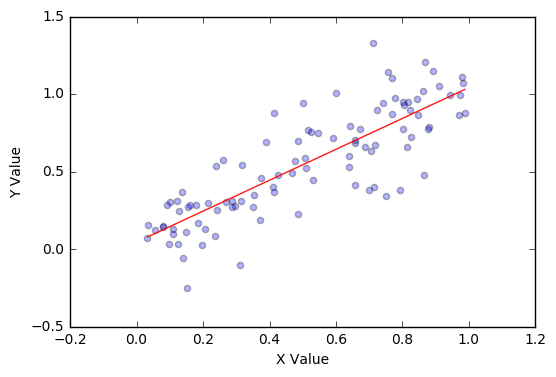

In [34]:
# Generate ys correlated with xs by adding normally distributed errors
Y = X +  0.2*np.random.randn(100)

linreg(X,Y)

In [36]:
# Let's quickly take a look at the correlation
np.corrcoef(X,Y)

array([[ 1.        ,  0.82927814],
       [ 0.82927814,  1.        ]])

In a situation like the above, the line of best fit does indeed model the dependent variable Y quite well (with a high $R^2$ value)

### Evaluating and reporting results
The regression model relies on several assumptions:
(I believe that some if not all of these are coming from the Gauss-Markov theorem, and BLUE)
 - The independent variable is not random
 - The variance of the error term is constant accross observations.
 - The errors are not autocorrelated. The Durbin-Watson statistc detects this; if it is close to 2, there is no autocorrelation.
 - The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.
 
If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the $R^2$ value tells us the fraction of the total variation of $Y$ tha is explained by the model.

When making a prediction based on the model, it's useful to report not only a single value but also a confidence interval. The linear regression reports 95% confidece intervals for the regression parameters, and we can visualize what this means using the `seaborn` library, which plits the regression line and highlights the 95% (by default) confidence interval for the regression line:

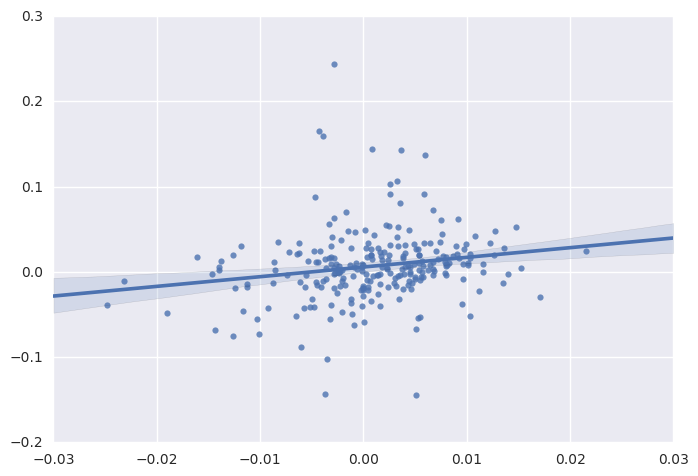

In [38]:
import seaborn as sb

start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2014, 1, 1)
asset = web.DataReader('TSLA','yahoo', start, end)
benchmark = web.DataReader('SPY', 'yahoo', start, end)

asset_close = asset.Close
asset_close.head()
benchmark_close = benchmark.Close
benchmark_close.head()

r_a = asset_close.pct_change()[1:]
r_b = benchmark_close.pct_change()[1:]

sb.regplot(r_b.values, r_a.values);

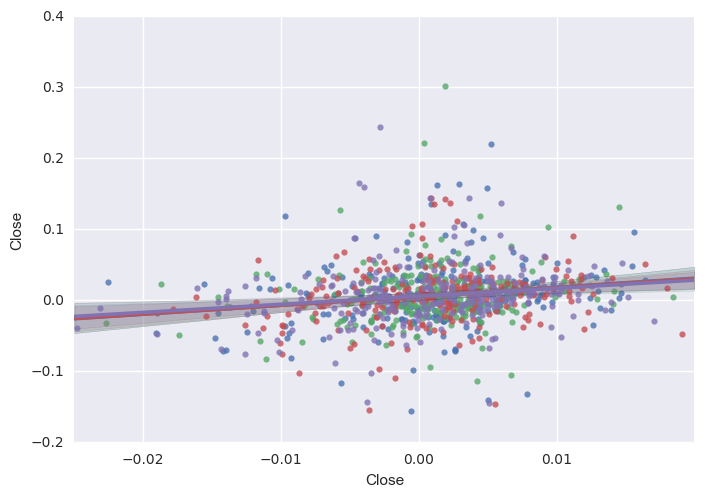

In [46]:
import seaborn as sb

start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2014, 1, 1)
asset = web.DataReader('TSLA','yahoo', start, end)
benchmark = web.DataReader('SPY', 'yahoo', start, end)

r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

sb.regplot(r_b.Open, r_a.Open)
sb.regplot(r_b.High, r_a.High)
sb.regplot(r_b.Low, r_a.Low)
sb.regplot(r_b.Close, r_a.Close);

OHLC regressions overlaid is a little too much to handle...

### Mathematical Background
This is a very brief overview of linear regression. For more, please see: [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)

### Ordinary Lease Squares
Regression works by optimizing the placement of the line of best fit (or plane in higher dimensions). It does so by defining how bad the fit is using an objective function. In ordinary least squares regression (OLS), what we use here, the objective function is:

$$\sum_{i=1}^n (Y_i - a - bX_i)^2$$

We use $a$ and $b$ to represent the potential candidates for $\alpha$ and $\beta$. What this objective function means is that for each point on the line of best fit we compare it with the real point and take the square of the difference. This function will decrease as we get better parameter estimates. Regression is a simple case of numerical optimization that has a closed form solution and does not need any optimizer. We just find the results that minimize the objective function.

We will denote the eventual model that results from minimizing our objective function as:

$$ \hat{Y} = \hat{\alpha} + \hat{\beta}X $$

With $\hat{\alpha}$ and $\hat{\beta}$ being the chosen estimates for the parameters that we use for prediction and $\hat{Y}$ being the predicted values of $Y$ given the estimates.

### Standard Error

We can also find the standard error of estimate, which measures the standard deviation of the error term $\epsilon$, by getting the `scale` parameter of the model returned by the regression and taking its square root. The formula for standard error of estimate is

$$ s = \left( \frac{\sum_{i=1}^n \epsilon_i^2}{n-2} \right)^{1/2} $$

If $\hat{\alpha}$ and $\hat{\beta}$ were the true parameters ($\hat{\alpha} = \alpha$ and $\hat{\beta} = \beta$), we could represent the error for a particular predicted value of $Y$ as $s^2$ for all values of $X_i$. We could simply square the difference $(Y - \hat{Y})$ to get the variance because $\hat{Y}$ incorporates no error in the paremeter estimates themselves. Because $\hat{\alpha}$ and $\hat{\beta}$ are merely estimates in our construction of the model of $Y$, any predicted values , $\hat{Y}$, will have their own standard error based on the distribution of the $X$ terms that we plug into the model. This forecast error is represented by the following:

$$ s_f^2 = s^2 \left( 1 + \frac{1}{n} + \frac{(X - \mu_X)^2}{(n-1)\sigma_X^2} \right) $$

where $\mu_X$ is the mean of our observations of $X$ and $\sigma_X$ is the standard deviation of $X$. This adjustment to $s^2$ incorporates the uncertainty in our parameter estimates. Then the 95% confidence interval for the prediction is $\hat{Y} \pm t_cs_f$, where $t_c$ is the critical value of the t-statistic for $n$ samples and a desired 95% confidence.